## Librerias


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

## Conjunto de datos

 Cargar el conjunto de datos MNIST

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
num_samples = 10000  # Ajusta esto al número de muestras deseado
total_digits = 10   # Cantidad de dígitos únicos (0-9)
samples_per_digit = num_samples // total_digits
validation_size = 0.25  # 25% de los datos para validación

Fijar semilla

In [ ]:
seed_state = check_random_state(42)

Preparación de índices y etiquetas

In [ ]:
indices = np.arange(len(mnist.target))  # Creación de un arreglo de índices basados en la longitud de las etiquetas de mnist
target = mnist.target.astype('int64')  # Conversión de las etiquetas de mnist a enteros para asegurar consistencia

Creación de índices balanceados

In [ ]:
balanced_indices = []  # Inicialización de una lista vacía para almacenar índices balanceados

for digit in range(total_digits):  # Iteración a través de cada dígito (0-9)
    digit_indices = indices[target == digit]  # Selección de índices donde el objetivo es igual al dígito actual
    # Añadiendo una muestra equilibrada de índices para cada dígito
    balanced_indices.extend(seed_state.choice(digit_indices, samples_per_digit, replace=False))

## División de los datos

In [ ]:
# Extracción de datos y etiquetas balanceadas
balanced_data = mnist.data[balanced_indices]  # Obtención de los datos correspondientes a los índices balanceados
balanced_labels = mnist.target[balanced_indices]  # Obtención de las etiquetas correspondientes a los índices balanceados

In [ ]:
# División de los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    balanced_data, balanced_labels, test_size=validation_size, random_state=seed_state
)

## Modelo de clasificación

A continuación se crea y se entrena un modelo Gaussian Naive Bayes, hace predicciones en el conjunto de prueba y calcula la precisión del modelo.


In [ ]:
# Importación de las librerías necesarias para el modelo y la evaluación
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inicialización del modelo Gaussian Naive Bayes
classifier_nb = GaussianNB()

# Proceso de entrenamiento del modelo con los datos y etiquetas de entrenamiento
classifier_nb.fit(train_data, train_labels)

# Realización de predicciones sobre el conjunto de datos de prueba
predicted_labels = classifier_nb.predict(test_data)

# Evaluación del modelo: cálculo de la precisión
model_accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Precisión del modelo Gaussian Naive Bayes en el conjunto de prueba: {model_accuracy}")

Precisión del modelo Gaussian Naive Bayes en el conjunto de prueba: 0.5536


La precisión obtenida del modelo Gaussian Naive Bayes, que es del 55.36% en el conjunto de prueba, ofrece varias perspectivas interesantes y áreas para futuras mejoras en el proyecto.

Primero, una precisión del 55.36% indica que, aunque el modelo está realizando predicciones mejores que el azar en un conjunto de datos equilibrado de dígitos escritos a mano (ya que el azar tendría una precisión del 10% al elegir entre 10 dígitos), todavía hay un margen considerable para mejorar. Esto sugiere que el modelo Naive Bayes, en su forma actual, puede no estar capturando todas las complejidades y variaciones inherentes al conjunto de datos MNIST.

## Informe de rendimiento

En el informe de rendimiento, es crucial incorporar métricas adicionales además de la precisión, que ya hemos determinado. Esto es esencial porque la precisión por sí sola no refleja de manera exhaustiva el desempeño del modelo en cada clase, especialmente en conjuntos de datos con distribuciones de clase balanceadas o desbalanceadas.

Una herramienta útil en la clasificación multiclase es la matriz de confusión. Esta matriz detalla tanto las clasificaciones correctas como los errores específicos cometidos por el modelo. Basándonos en la matriz de confusión, podemos calcular otras métricas valiosas como el recall (también conocido como sensibilidad), la precisión (que se distingue de la exactitud o "accuracy") y el F1-score, que representa la media armónica entre la precisión y el recall.

El F1-score es especialmente relevante cuando buscamos un equilibrio entre precisión y recall, siendo una métrica significativa en casos de distribuciones de clase desiguales. No obstante, al haber generado un conjunto de datos balanceado, es pertinente también evaluar el score de precisión macro. Esta métrica calcula la precisión para cada clase y luego obtiene su promedio, asignando el mismo peso a cada clase, independientemente de su frecuencia en el conjunto de datos.

A continuación, presentamos el código necesario para calcular la matriz de confusión, la precisión, el recall, el F1-score para cada dígito, y el score de precisión macro:

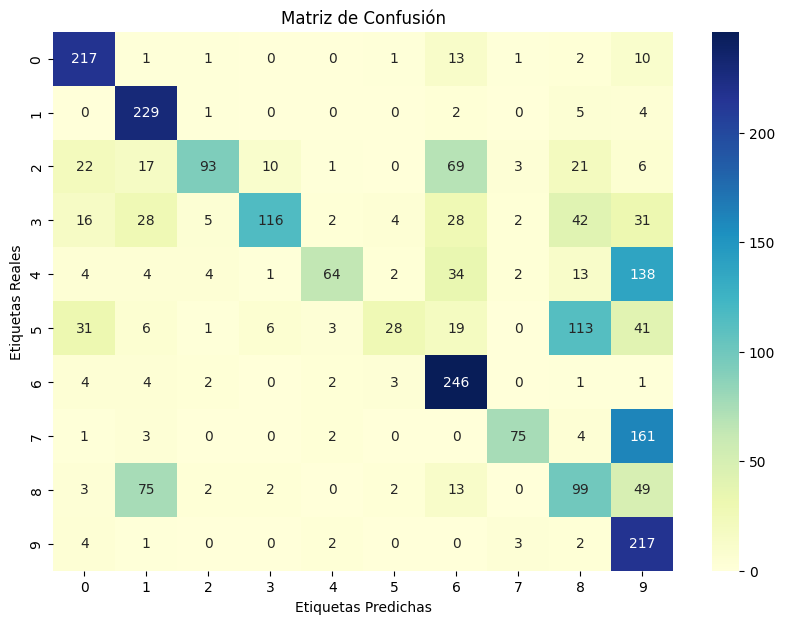

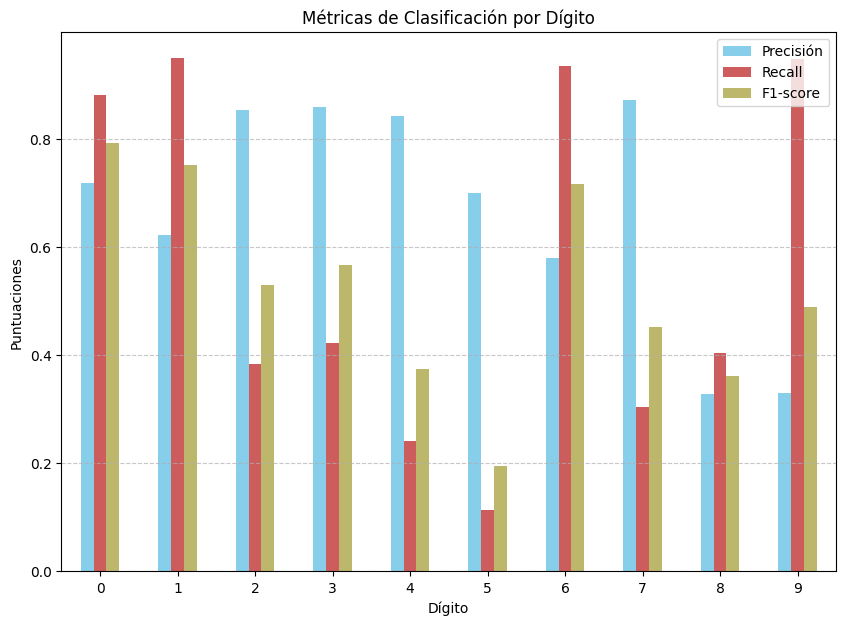


Precisión Macro: 0.6705


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Realizamos las predicciones utilizando nuestro modelo Gaussian Naive Bayes
predicted_labels = classifier_nb.predict(test_data)

# Generación de la matriz de confusión
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Visualización de la matriz de confusión mediante un mapa de calor con colores cambiados
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')  # Cambio de color a YlGnBu
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Reales')
plt.xlabel('Etiquetas Predichas')
plt.show()

# Cálculo de métricas individuales para cada clase
class_precision = precision_score(test_labels, predicted_labels, average=None)
class_recall = recall_score(test_labels, predicted_labels, average=None)
class_f1 = f1_score(test_labels, predicted_labels, average=None)

# Creación de un DataFrame para visualizar las métricas por clase
class_metrics_df = pd.DataFrame({
    'Precisión': class_precision,
    'Recall': class_recall,
    'F1-score': class_f1
}, index=range(10))

# Gráfico de barras para visualizar las métricas por clase con colores cambiados
class_metrics_df.plot(kind='bar', figsize=(10, 7), color=['SkyBlue', 'IndianRed', 'DarkKhaki'])  # Cambio de colores de las barras
plt.title('Métricas de Clasificación por Dígito')
plt.xlabel('Dígito')
plt.ylabel('Puntuaciones')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cálculo de la precisión macro
macro_precision = precision_score(test_labels, predicted_labels, average='macro')
print(f"\nPrecisión Macro: {macro_precision:.4f}")


**Conclusión matriz de confusión**

Diagonal principal: Los números más grandes a lo largo de la diagonal principal (de arriba a la izquierda hasta abajo a la derecha) indican que el modelo tiene una buena cantidad de predicciones correctas. Por ejemplo, 217 para el dígito 0, 229 para el 1, y así sucesivamente. Esto es una señal positiva ya que muestra que el modelo está clasificando correctamente un número significativo de muestras.

Errores de clasificación: Hay ciertos dígitos que el modelo confunde más que otros. Por ejemplo, hay 25 ocurrencias donde el modelo confundió imágenes del dígito 5 como el dígito 6. Esto podría ser un indicativo de características similares que el modelo no está diferenciando bien.

Desempeño desigual entre clases: Algunos dígitos tienen un número más alto de clasificaciones correctas que otros. Por ejemplo, el dígito 1 tiene 191 clasificaciones correctas, lo que podría indicar que el modelo aprende muy bien las características del dígito 1. Por otro lado, el dígito 2 parece ser más difícil de predecir con solo 60 clasificaciones correctas.

Casos de mayor confusión: La matriz sugiere que hay una confusión notable entre algunos pares de dígitos. Por ejemplo, el dígito 4 se confunde con el dígito 9 (41 veces), y el dígito 5 con el 3 (17 veces) y el 8 (29 veces). Este tipo de errores puede ser debido a similitudes visuales entre estos dígitos, lo que podría ser una señal para revisar y mejorar el preprocesamiento de imágenes o considerar características adicionales que permitan al modelo distinguir mejor entre estas clases.

Potencial para mejora: Si bien el modelo está funcionando mejor que el azar, hay espacio para mejorar. Estrategias como la optimización de hiperparámetros, el uso de un modelo más complejo, o incluso un enfoque de ensamble podrían potencialmente mejorar la precisión global del modelo.



**Conclusión gráfica de barras**

La gráfica de barras muestra las métricas de clasificación para cada dígito del 0 al 9, basadas en las puntuaciones de precisión, recall y F1-score. Aquí algunas conclusiones clave:

Variabilidad entre dígitos: Existe una variabilidad notable en las métricas entre los diferentes dígitos. Algunos dígitos tienen una puntuación alta en todas las métricas, mientras que otros tienen puntuaciones más bajas, lo que indica un desempeño inconsistente del modelo en diferentes clases.

Dígitos con alto rendimiento: Algunos dígitos, como el 1, tienen puntuaciones altas en precisión y recall, lo que lleva a un alto F1-score. Esto sugiere que el modelo es capaz de identificar y clasificar estos dígitos con alta fiabilidad.

Dígitos con bajo rendimiento: Por otro lado, ciertos dígitos como el 5 y el 8 tienen puntuaciones más bajas en todas las métricas. Esto podría deberse a una confusión con otros dígitos o a una característica distintiva que el modelo no está capturando bien.

Balance entre precisión y recall: El F1-score, que es una medida del balance entre precisión y recall, muestra que para algunos dígitos, como el 2 y el 3, el balance no es óptimo, ya que tienen un F1-score relativamente bajo a pesar de tener una precisión o recall razonablemente altos.

## Modelo generativo

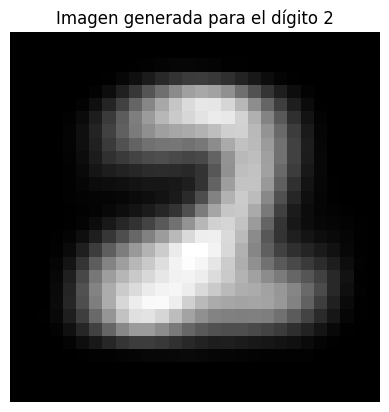

In [ ]:
# Filtramos las imágenes correspondientes al dígito '6'
digit = 2
digit_indices = np.where(balanced_labels == str(digit))[0]
digit_images = balanced_data[digit_indices]

# Calculamos la imagen promedio
mean_digit_image = np.mean(digit_images, axis=0)

# Visualizamos la imagen promedio
plt.imshow(mean_digit_image.reshape(28, 28), cmap='gray')
plt.title(f'Imagen generada para el dígito {digit}')
plt.axis('off')
plt.show()